In [ ]:
pip install tensorflow keras opencv-python matplotlib numpy pandas scikit-learn albumentations


In [ ]:
import pandas as pd

# Paths to annotation files
train_set_1_annotations = '/content/Licplatesdetection_train.csv'
train_set_2_annotations = '/content/Licplatesrecognition_train.csv'
# test_set_annotations = 'dataset/test_set/annotations.csv'

# Load annotations
df_train1 = pd.read_csv(train_set_1_annotations)
df_train2 = pd.read_csv(train_set_2_annotations)
# df_test = pd.read_csv(test_set_annotations)

print("Training Set 1 Annotations:", df_train1.head())
print("Training Set 2 Annotations:", df_train2.head())
# print("Test Set Annotations:", df_test.head())


Training Set 1 Annotations:     img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222
Training Set 2 Annotations:     img_id      text
0    0.jpg  117T3989
1    1.jpg  128T8086
2   10.jpg   94T3458
3  100.jpg  133T6719
4  101.jpg   68T5979


In [ ]:
print(df_train1['img_id'].head(1))


0    1.jpg
Name: img_id, dtype: object


In [ ]:
import os

for img_path in df_train1['img_id']:
    if not os.path.exists(img_path):
        print(f"File does not exist: {img_path}")


File does not exist: 1.jpg
File does not exist: 10.jpg
File does not exist: 100.jpg
File does not exist: 101.jpg
File does not exist: 102.jpg
File does not exist: 103.jpg
File does not exist: 104.jpg
File does not exist: 105.jpg
File does not exist: 106.jpg
File does not exist: 107.jpg
File does not exist: 108.jpg
File does not exist: 109.jpg
File does not exist: 11.jpg
File does not exist: 110.jpg
File does not exist: 111.jpg
File does not exist: 112.jpg
File does not exist: 113.jpg
File does not exist: 114.jpg
File does not exist: 115.jpg
File does not exist: 116.jpg
File does not exist: 117.jpg
File does not exist: 118.jpg
File does not exist: 119.jpg
File does not exist: 12.jpg
File does not exist: 120.jpg
File does not exist: 121.jpg
File does not exist: 122.jpg
File does not exist: 123.jpg
File does not exist: 124.jpg
File does not exist: 125.jpg
File does not exist: 126.jpg
File does not exist: 127.jpg
File does not exist: 128.jpg
File does not exist: 129.jpg
File does not exist

In [ ]:
for i in range(1):
    img_path = df_train1.iloc[i]['img_id']
    print(f"Trying to load: {img_path}")
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error: Could not load image {img_path}")
        continue


Trying to load: 1.jpg
Error: Could not load image 1.jpg


In [ ]:
import matplotlib.pyplot as plt
import cv2

def visualize_bounding_boxes(df, num_samples=5):
    for i in range(num_samples):
        img_path = df.iloc[i]['img_id']
        image = cv2.imread(img_path)

        # Check if the image was loaded correctly
        if image is None:
            print(f"Error: Could not load image {img_path}")
            continue  # Skip to the next image

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ymin = df.iloc[i]['ymin']
        xmin = df.iloc[i]['xmin']
        ymax = df.iloc[i]['ymax']
        xmax = df.iloc[i]['xmax']

        # Draw bounding box
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

        plt.imshow(image)
        plt.title(f"Image {i+1} with Bounding Box")
        plt.axis('off')
        plt.show()

# Visualize bounding boxes from Training Set 1
visualize_bounding_boxes(df_train1, num_samples=3)

Error: Could not load image 1.jpg
Error: Could not load image 10.jpg
Error: Could not load image 100.jpg


In [ ]:
from collections import Counter

# Display sample texts
print("Sample License Plate Texts:", df_train2['text'].head())

# Character frequency
all_text = ''.join(df_train2['text'].astype(str).values)
char_counts = Counter(all_text)
print("Character Frequencies:", char_counts)


Sample License Plate Texts: 0    117T3989
1    128T8086
2     94T3458
3    133T6719
4     68T5979
Name: text, dtype: object
Character Frequencies: Counter({'1': 1161, 'T': 895, '7': 601, '9': 595, '6': 556, '3': 551, '8': 531, '5': 522, '4': 515, '2': 471, '0': 412, 'N': 5})


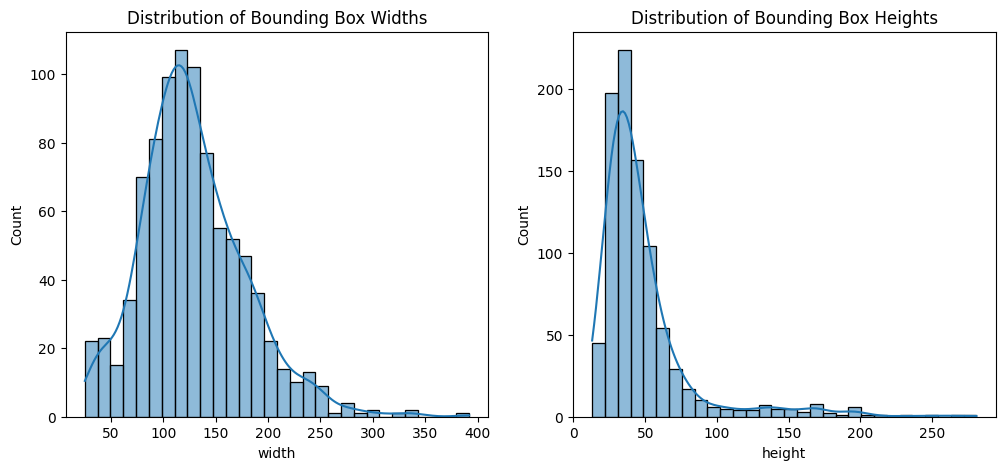

In [ ]:
import seaborn as sns

# Calculate width and height of bounding boxes
df_train1['width'] = df_train1['xmax'] - df_train1['xmin']
df_train1['height'] = df_train1['ymax'] - df_train1['ymin']

# Plot distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train1['width'], bins=30, kde=True)
plt.title('Distribution of Bounding Box Widths')

plt.subplot(1, 2, 2)
sns.histplot(df_train1['height'], bins=30, kde=True)
plt.title('Distribution of Bounding Box Heights')

plt.show()


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 16954, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 16954 (delta 76), reused 98 (delta 46), pack-reused 16805 (from 1)
Receiving objects: 100% (16954/16954), 15.70 MiB | 17.73 MiB/s, done.
Resolving deltas: 100% (11614/11614), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.8/872.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [ ]:
import yaml

data = {
    'train': '/content/drive/MyDrive/Licplatesdetection_train/license_plates_detection_train',
    'val': '/content/drive/MyDrive/test/test/test',  # Ideally, split a portion for validation
    'nc': 1,  # number of classes
    'names': ['license_plate']
}

# Save to dataset.yaml
# with open('dataset.yaml', 'w') as file:
#     yaml.dump(data, file)
with open('dataset.yaml', 'r') as file:
    config = yaml.safe_load(file)
    print(config)


{'names': ['license_plate'], 'nc': 1, 'train': '/content/drive/MyDrive/Licplatesdetection_train/license_plates_detection_train', 'val': '/content/drive/MyDrive/test/test/test'}


In [ ]:
import os

def convert_to_yolo(df, images_dir, labels_dir):
    if not os.path.exists(labels_dir):
        os.makedirs(labels_dir)

    for idx, row in df.iterrows():
        img_path = row['img_id']
        img_name = os.path.basename(img_path).split('.')[0]
        txt_path = os.path.join(labels_dir, f"{img_name}.txt")

        image = cv2.imread(img_path)
        if image is None:
            print(f"Error: Could not load image {img_path}")
            continue

        height, width, _ = image.shape
        # YOLO format: class x_center y_center width height (all normalized)
        class_id = 0  # 'license_plate' class

        x_center = ((row['xmin'] + row['xmax']) / 2) / width
        y_center = ((row['ymin'] + row['ymax']) / 2) / height
        bbox_width = (row['xmax'] - row['xmin']) / width
        bbox_height = (row['ymax'] - row['ymin']) / height

        with open(txt_path, 'w') as f:
            f.write(f"{class_id} {x_center} {y_center} {bbox_width} {bbox_height}\n")

# Define directories
images_dir = '/content/drive/MyDrive/Licplatesdetection_train/license_plates_detection_train'
labels_dir = '/content/drive/MyDrive/Licplatesrecognition_train/license_plates_recognition_train'

# Convert annotations
convert_to_yolo(df_train1, images_dir, labels_dir)


Error: Could not load image 1.jpg
Error: Could not load image 10.jpg
Error: Could not load image 100.jpg
Error: Could not load image 101.jpg
Error: Could not load image 102.jpg
Error: Could not load image 103.jpg
Error: Could not load image 104.jpg
Error: Could not load image 105.jpg
Error: Could not load image 106.jpg
Error: Could not load image 107.jpg
Error: Could not load image 108.jpg
Error: Could not load image 109.jpg
Error: Could not load image 11.jpg
Error: Could not load image 110.jpg
Error: Could not load image 111.jpg
Error: Could not load image 112.jpg
Error: Could not load image 113.jpg
Error: Could not load image 114.jpg
Error: Could not load image 115.jpg
Error: Could not load image 116.jpg
Error: Could not load image 117.jpg
Error: Could not load image 118.jpg
Error: Could not load image 119.jpg
Error: Could not load image 12.jpg
Error: Could not load image 120.jpg
Error: Could not load image 121.jpg
Error: Could not load image 122.jpg
Error: Could not load image 123.j

In [ ]:
# Navigate to the YOLOv5 directory
%cd /content/yolov5

# Train the model
!python train.py --img 640 --batch 16 --epochs 50 --data dataset.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --name license_plate_detector


/content/yolov5
2024-09-18 07:24:08.066315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 07:24:08.117366: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 07:24:08.132771: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, mult

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import string

# Define characters (assuming uppercase letters and digits)
characters = string.ascii_uppercase + string.digits
num_classes = len(characters) + 1  # +1 for the CTC blank label

# Create a character to index mapping
char_to_num = {char: idx + 1 for idx, char in enumerate(characters)}  # 0 is reserved for blank

def encode_text(text):
    return [char_to_num[char] for char in text if char in char_to_num]

df_train2['encoded'] = df_train2['text'].apply(encode_text)


In [ ]:
from tensorflow.keras import layers, models

def build_crnn_model(input_shape, num_classes):
    input_img = layers.Input(shape=input_shape, name='input_img')

    # Convolutional layers
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(1, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(1, 2))(x)

    # Flatten the output before passing to RNN
    x = layers.Reshape((-1, x.shape[-1]))(x)  # Reshape to (timesteps, features)

    # Recurrent layers
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)

    # Output layer
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_img, outputs=x)
    return model

# Define input shape (height, width, channels)
input_shape = (64, 256, 1)  # Adjust as needed
num_classes = 10  # Define the number of classes
model_crnn = build_crnn_model(input_shape, num_classes)
model_crnn.summary()


Model: "functional_141"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)               │ (None, 64, 256, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_320 (Conv2D)                  │ (None, 64, 256, 64)         │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_320 (MaxPooling2D)     │ (None, 32, 128, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_321 (Conv2D)                  │ (None, 32, 128, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_321 (MaxPooling2D)     │ (None, 16, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_322 (Conv2D)                  │ (None, 16, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_322 (MaxPooling2D)     │ (None, 16, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_323 (Conv2D)                  │ (None, 16, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_323 (MaxPooling2D)     │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_80 (Reshape)                 │ (None, 256, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_160 (Bidirectional)    │ (None, 256, 256)            │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_161 (Bidirectional)    │ (None, 256, 256)            │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256, 10)             │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,750,794 (6.68 MB)

 Trainable params: 1,750,794 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 18.1 MB/s eta 0:00:00


In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
import easyocr  # Efficient for OCR tasks

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")

    # Convert to grayscale and apply Gaussian blur
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edged = cv2.Canny(blur, 30, 150)

    # Find contours and filter based on size and aspect ratio
    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    license_plate_candidates = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = w * h
        if 2 < aspect_ratio < 5 and area > 500:  # Modify thresholds based on the expected plate size and aspect ratio
            license_plate_candidates.append((x, y, w, h))

    return license_plate_candidates, image

def extract_license_plate_text(image_region):
    results = reader.readtext(image_region, allowlist='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    return ' '.join([text for _, text, _ in results])

def process_test_images(directory_path):
    detected_license_plates = []

    for filename in os.listdir(directory_path):
        if filename.lower().endswith((".jpg", ".png")):
            image_path = os.path.join(directory_path, filename)
            candidates, image = preprocess_image(image_path)

            for (x, y, w, h) in candidates:
                license_plate_region = image[y:y+h, x:x+w]
                cv2_imshow(license_plate_region)  # Show detected plate area
                plate_text = extract_license_plate_text(license_plate_region)
                print(f"Detected License Plate Text: {plate_text}")
                detected_license_plates.append({'image': filename, 'license_plate_text': plate_text})

    return detected_license_plates

# Path to the directory containing the test images
test_images_directory = '/content/drive/MyDrive/test/test/test'

# Process all test images
results = process_test_images(test_images_directory)

# Output results
for result in results:
    print(f"Image: {result['image']}, Detected License Plate: {result['license_plate_text']}")


This cell output is too large and can only be displayed while logged in.
